<a href="https://colab.research.google.com/github/Thiru609/Machine-Learning-Algorithms/blob/main/Logistic_Regression_and_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files 
uploads = files.upload()

Saving HR_comma_sep.csv.xls to HR_comma_sep.csv.xls


**Thirumurugan A**
18BCE2060

In [ ]:
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
import io
df = pd.read_csv("HR_comma_sep.csv.xls")
df=df.dropna()
df.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
left = df[df.left==1]
left.shape
retained = df[df.left==0]
retained.shape
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [ ]:
df.groupby('salary').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
salary,,,,,,,,
high,0.637470,0.704325,3.767179,199.867421,3.692805,0.155214,0.066289,0.058205
low,0.600753,0.717017,3.799891,200.996583,3.438218,0.142154,0.296884,0.009021
medium,0.621817,0.717322,3.813528,201.338349,3.529010,0.145361,0.204313,0.028079


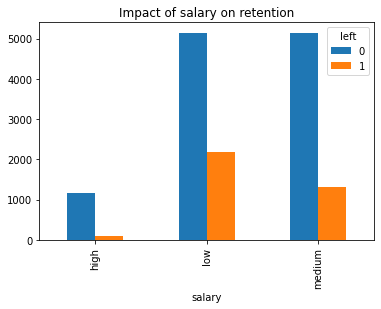

In [ ]:
pd.crosstab(df.salary,df.left).plot(kind='bar',title='Impact of salary on retention')


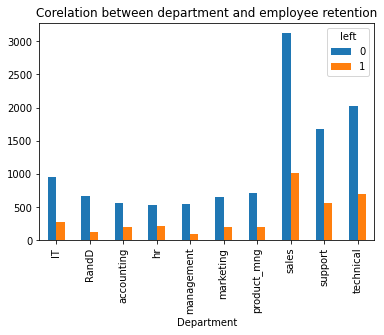

In [ ]:
pd.crosstab(df.Department,df.left).plot(kind='bar', title='Corelation between department and employee retention')

In [ ]:
dflr = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']] 
dflr.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


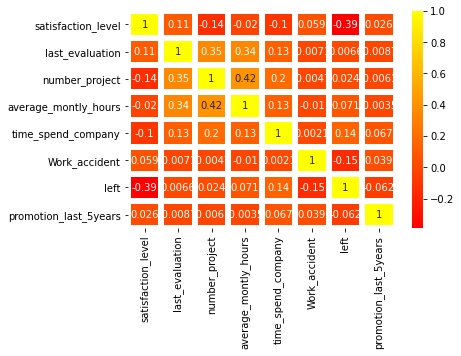

In [ ]:
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, annot=True, linewidth=4.8, cmap="autumn")

In [ ]:
df2 = df[['satisfaction_level', 'average_montly_hours', 'promotion_last_5years', 'salary']]
df2.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [ ]:
dummies = pd.get_dummies(df.salary, prefix="salary")
df3 = pd.concat([df2,dummies], axis=1)
df3.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [ ]:
df4 = df3.drop(['salary', 'salary_high'], axis='columns')
df4.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_low,salary_medium
0,0.38,157,0,1,0
1,0.80,262,0,0,1
2,0.11,272,0,0,1
3,0.72,223,0,1,0
4,0.37,159,0,1,0


In [ ]:
X = df4
y = df.left
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
reg = LogisticRegression()
reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred=reg.predict(X_test)

In [ ]:
reg.score(X_test,y_test)
print("Accuracy on Training set: ",reg.score(X_train,y_train))
print("Accuracy on Testing set: ",reg.score(X_test,y_test))

Accuracy on Training set:  0.7795028097914087
Accuracy on Testing set:  0.7706666666666667


In [ ]:
from sklearn.metrics import classification_report
print("Classification Report: ")
print(classification_report(y_test, y_pred)) 
print("")
from sklearn.metrics import roc_auc_score 
y_score=reg.decision_function(X_test) 
print("ROC Score: ",roc_auc_score(y_test, y_score))

Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.93      0.86      3454
           1       0.51      0.23      0.32      1046

    accuracy                           0.77      4500
   macro avg       0.66      0.58      0.59      4500
weighted avg       0.73      0.77      0.74      4500


ROC Score:  0.764746114184679
